In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


In [6]:
import pandas as pd
import requests

url = "https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Red%20Wine/winequality-red.csv"
s = requests.get(url).content
df = pd.read_csv(url)


In [7]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [21]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.0
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.0
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.0
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.0
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.0
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.0
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,0.0


In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

df.isnull().sum().sum()

0

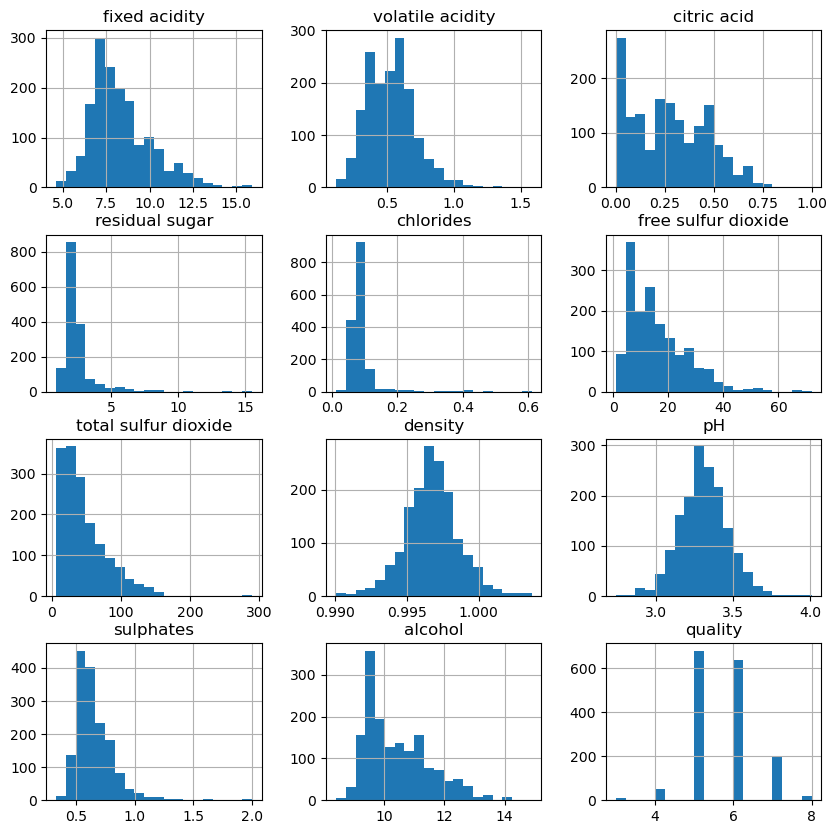

In [15]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

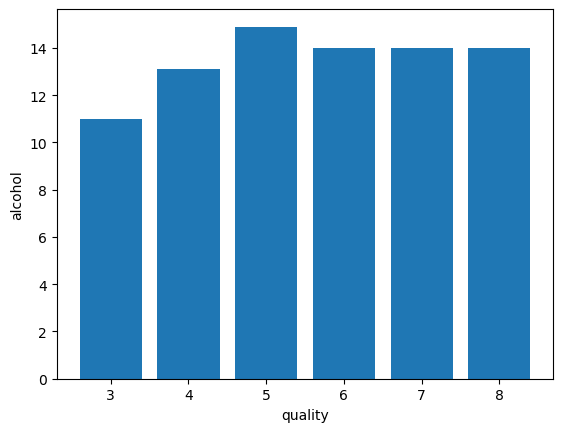

In [16]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

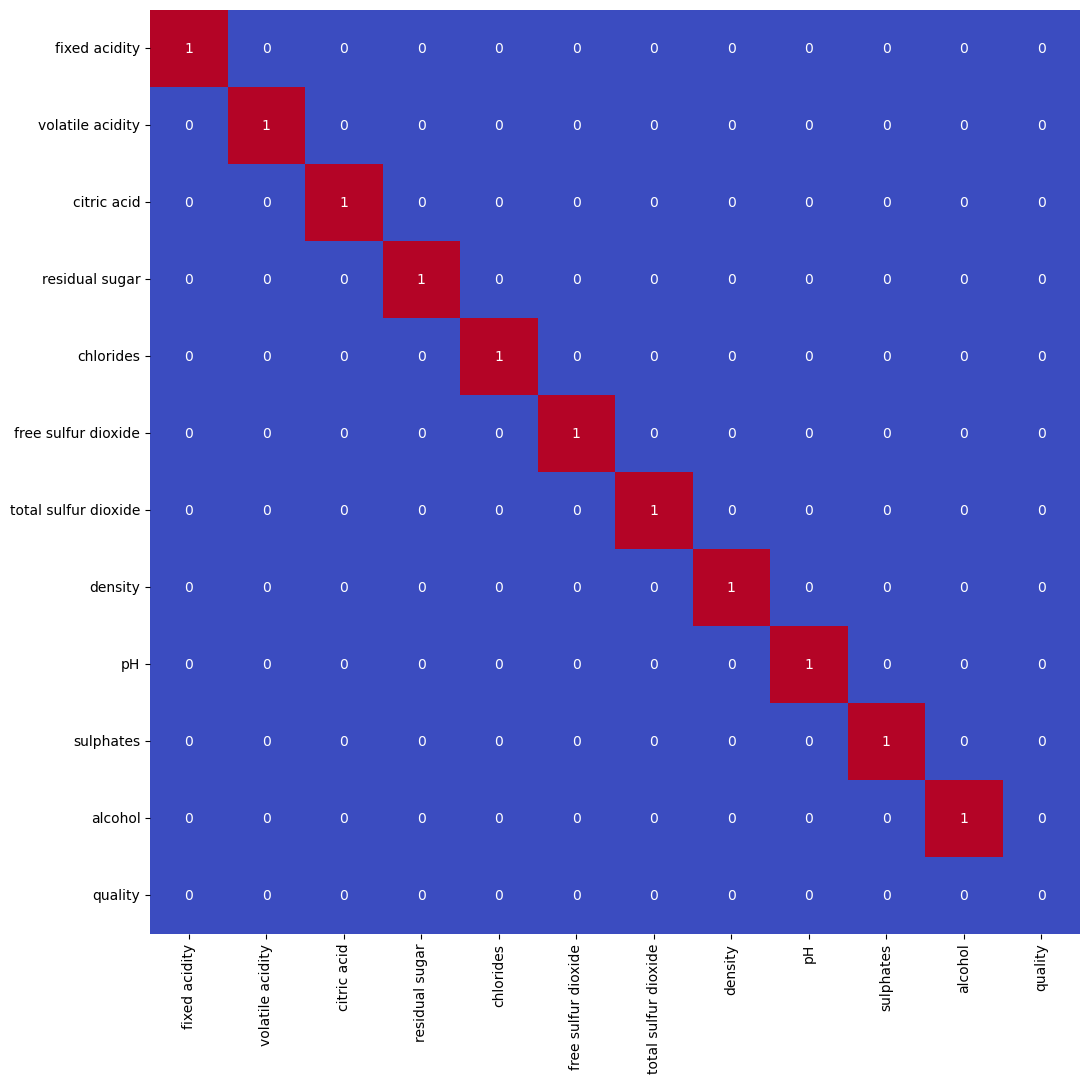

In [22]:
corr_matrix = df.corr() > 0.7
plt.figure(figsize=(12, 12))
sb.heatmap(corr_matrix, annot=True, cbar=False, cmap='coolwarm')
plt.show()

In [ ]:
#df = df.drop('total sulfur dioxide', axis=1)

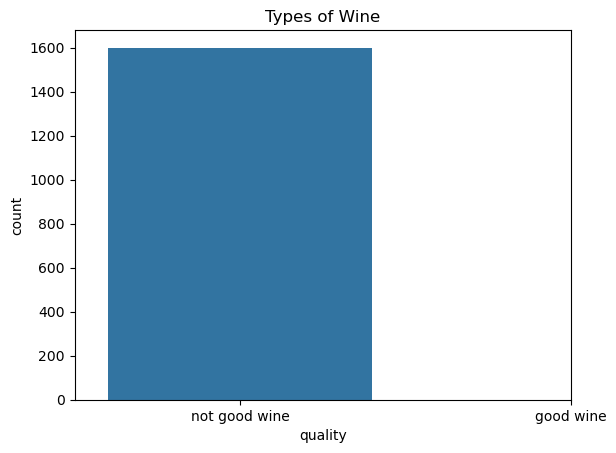

In [20]:
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
sns.countplot(data = df, x = 'quality')
plt.xticks([0,1], ['not good wine','good wine'])
plt.title("Types of Wine")
plt.show()

In [28]:

X = df.iloc[:,0:10].values
Y = df.iloc[:,-1].values
print(X)
print(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=1,shuffle =True )
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print(X_train)
print(X_test)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
classifier = KNeighborsClassifier(n_neighbors= 5, metric='minkowski', p=2)
classifier.fit(X_train,Y_train)
Y_pred1 = classifier.predict(X_test)
print(X_test)
print(Y_pred1)

ac1= accuracy_score(Y_pred1,Y_test)
print(ac1*100,'%')

import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(Y_test, Y_pred1), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(Y_test, Y_pred1), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(Y_test, Y_pred1), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(Y_test, Y_pred1), 2)) 
print("R2 score =", round(sm.r2_score(Y_test, Y_pred1), 2))

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,Y_train)
Y_pred2 = regressor.predict(X_test)
print(X_test)
print(Y_pred2)
r2_score = regressor.score(X_test,Y_test)
print(r2_score*100,'%')

#ac2= regressor.score(Y_pred2,Y_test)
#print(ac2*100,'%')

import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(Y_test, Y_pred2), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(Y_test, Y_pred2), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(Y_test, Y_pred2), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(Y_test, Y_pred2), 2)) 
print("R2 score =", round(sm.r2_score(Y_test, Y_pred2), 2))

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
Y_pred4 = clf.predict(X_test)
ac3 = metrics.accuracy_score(Y_test, Y_pred4)
print("Accuracy:",ac3*100,'%')



[[7.4     0.7     0.      ... 0.9978  3.51    0.56   ]
 [7.8     0.88    0.      ... 0.9968  3.2     0.68   ]
 [7.8     0.76    0.04    ... 0.997   3.26    0.65   ]
 ...
 [6.3     0.51    0.13    ... 0.99574 3.42    0.75   ]
 [5.9     0.645   0.12    ... 0.99547 3.57    0.71   ]
 [6.      0.31    0.47    ... 0.99549 3.39    0.66   ]]
[0 0 0 ... 0 0 0]
[[ 7.       0.65     0.02    ...  0.9972   3.47     0.67   ]
 [10.2      0.42     0.57    ...  0.9971   3.04     0.63   ]
 [ 5.2      0.34     0.      ...  0.9916   3.68     0.79   ]
 ...
 [ 6.6      0.725    0.09    ...  0.99655  3.35     0.49   ]
 [ 7.2      0.63     0.      ...  0.99675  3.37     0.58   ]
 [ 9.1      0.4      0.5     ...  0.99462  3.21     0.69   ]]
[[ 8.8      0.41     0.64    ...  0.9986   3.54     0.66   ]
 [ 8.7      0.63     0.28    ...  0.99734  3.26     0.63   ]
 [10.4      0.34     0.58    ...  0.997    3.19     0.7    ]
 ...
 [ 7.1      0.67     0.      ...  0.99768  3.44     0.54   ]
 [ 6.2      0.39     0.43

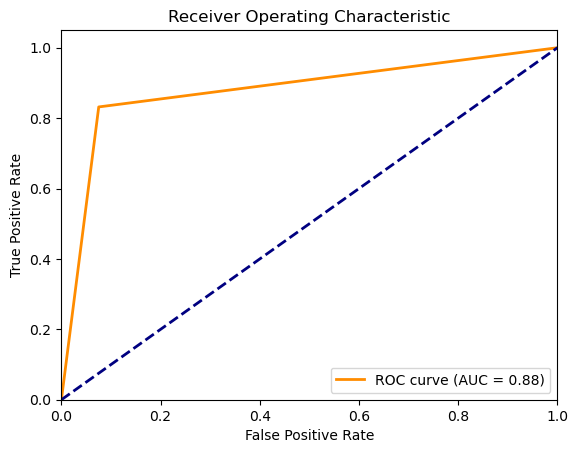

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
# Generate a random binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict probabilities of the positive class
y_scores = clf.predict_proba(X_test)[:, 1]

# Generate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute the AUC score
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()



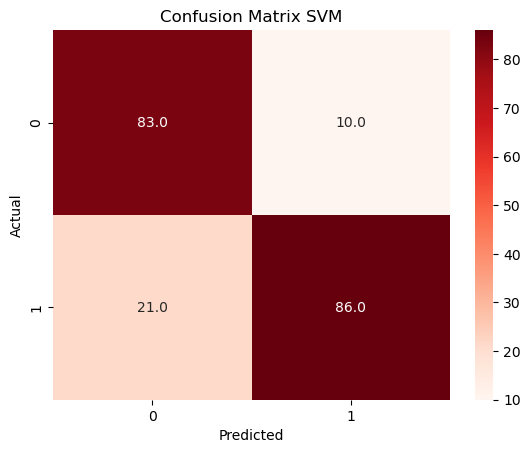

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
# Create an SVM classifier object
svm = SVC()

# Define hyperparameters to tune
hyperparameters = {'C': [0.1, 1, 10],
                   'gamma': [0.1, 1, 10]}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(svm, hyperparameters)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train SVM with the best hyperparameters
svm_best = SVC(**best_params)
svm_best.fit(X_train, y_train)

# Make predictions on test data
y_pred5 = svm_best.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred5)
# Heatmap Confusion Matrix
sns.heatmap(conf_mat, cmap = 'Reds', annot = True, fmt='.1f')
plt.title('Confusion Matrix SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

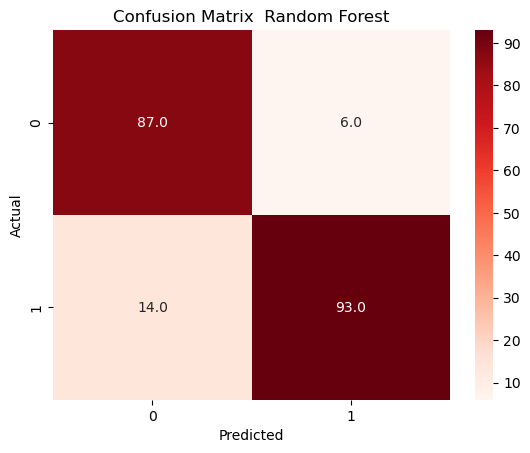

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
# Create a Random Forest classifier object
rf = RandomForestClassifier()

# Define hyperparameters to tune
hyperparameters = {'n_estimators': [100, 200, 300],
                   'max_depth': [None, 5, 10]}

# Perform randomized search to find the best hyperparameters
random_search = RandomizedSearchCV(rf, hyperparameters)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Train Random Forest with the best hyperparameters
rf_best = RandomForestClassifier(**best_params)
rf_best.fit(X_train, y_train)

# Make predictions on test data
y_pred6 = rf_best.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred6)
# Heatmap Confusion Matrix
sns.heatmap(conf_mat, cmap = 'Reds', annot = True, fmt='.1f')
plt.title('Confusion Matrix  Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

# Create an instance of the model
model = LinearRegression(fit_intercept=True)

# Train the model
model.fit(X_train, y_train)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 1.03450285e-02 -5.49333692e-02  2.45904855e-02  1.40459973e-02
 -2.80635285e-03  1.88841289e-01 -9.77339729e-03 -5.13842293e-03
 -1.66666127e-02  7.52925827e-03  2.20558880e-02  4.33803290e-02
 -5.55030498e-05  6.04402971e-03 -6.78459366e-02  5.03974150e-03
  8.42876085e-03 -2.09808902e-02 -8.78944726e-02  1.09614326e-02]
Intercept: 0.4963312862123655


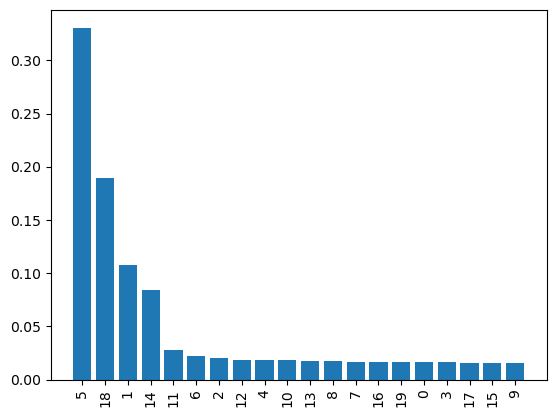

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the model
model = RandomForestClassifier(n_estimators=100, max_features='sqrt')

# Train the model
model.fit(X_train, y_train)

# Visualize feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()


